# **Is happiness contagious?**

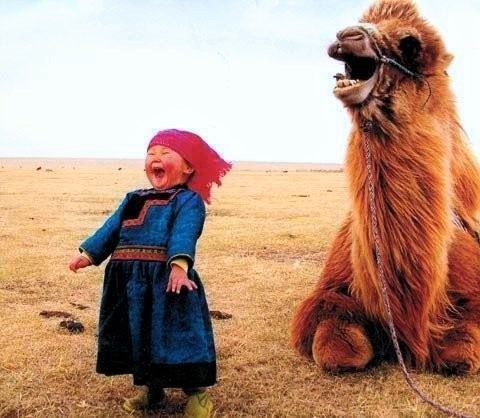

In this notebook we will discuss whether happiness is contagious or not and visualize results.

We will use data coming from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness) .

In [1]:
#@title
!pip3 install plotly==4.9.0

import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#@title
countryCodes = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/nationCodes.csv")
csv2019 = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/2019.csv")
csv2018 = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/2018.csv")
csv2017 = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/2017.csv")
csv2016 = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/2016.csv")
csv2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


As evidenced, each entry has 9 fields:

1. Country or region - the name of the country;
2. GDP per capita - an index measuring the goodness of GDP per capita in the country;
3. Social support - an index measuring the goodness of social support in the country;
4. Healthy life expectancy - an index measuring the goodness of healthy life expectancy in the country;
5. Freedom to make life choices - an index measuring the freedom to make life choices in the country;
6. Generosity - an index measuring how generous a country is;
7. Perceptions of corruption - an index measuring the perception of corruption in the country;
8. Score - the happiness score of the country, calculated as the sum of the above mentioned indexes;
9. Overall rank - the country rank based on happiness score.





## **Preliminary Visualization**


Let's start with a simple but effective visualization of our main feature: *Happiness*

In [3]:
#@title
#UNCOMMENT FIRST TIME
#!pip install geonamescache
#!sudo apt-get install libgeos-3.5.0
#!sudo apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [4]:
#@title
import matplotlib as mpl
#from geonamescache import GeonamesCache
#from matplotlib.patches import Polygon
#from matplotlib.collections import PatchCollection
#from mpl_toolkits.basemap import Basemap

In [5]:
#@title

chorop1 = pd.merge(csv2019, countryCodes, on='Country or region')

values = chorop1["Score"]
bins = np.linspace(values.min() - 0.1, values.max() + 0.1, 6)
#bins = np.linspace(-3,3, 5)
chorop1['Happiness'] = np.digitize(values, bins)
chorop1['Happiness'] =  chorop1['Happiness'].astype(str)
chorop1['Happiness'] = chorop1['Happiness'].map({"1":"2.753 - 3.7762", "2": "3.7762 - 4.7994", "3": "4.7994 - 5.8226", "4": "5.8226 - 6.8458", "5": "6.8458 - 7.869"})

fig = px.choropleth(chorop1, locations="Code",
                    color="Happiness", # lifeExp is a column of gapminder
                    hover_name="Country or region",
                    category_orders={"Happiness": ["2.753 - 3.7762", "3.7762 - 4.7994", "4.7994 - 5.8226", "5.8226 - 6.8458", "6.8458 - 7.869"]},
                    color_discrete_map={
                        "2.753 - 3.7762" : "rgba(0.9987543252595156, 0.9437139561707035, 0.6836908881199539, 1.0)",
                        "3.7762 - 4.7994" : "rgba(0.996078431372549, 0.8091503267973856, 0.39607843137254906, 1.0)",
                        "4.7994 - 5.8226" : "rgba(0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0)",
                        "5.8226 - 6.8458" : "rgba(0.8836601307189543, 0.39215686274509803, 0.054901960784313725, 1.0)",
                        "6.8458 - 7.869" : "rgba(0.6635294117647059, 0.23381776239907726, 0.013194925028835063, 1.0)"
                        }
                  )
fig.update_layout(title_text="Happiness distribution")
fig.show()


It can be noticed at a first glance that the distribution of happiness is not uniform but it is concentrated around North America, North Europe and Oceania. These countries happen to be also among the richest ones so, for sake of curiousity, let's deepen this aspect.


*Because, let's be honest, money doesn't make you happy but....*

In [6]:
#@title

chorop2 = pd.merge(csv2019, countryCodes, on='Country or region')
values = chorop2["GDP per capita"]
bins = np.linspace(values.min() - 0.1, values.max() + 0.1, 6)
#bins = np.linspace(-3,3, 5)
chorop2['GDP capita'] = np.digitize(values, bins)
chorop2['GDP capita'] =  chorop2['GDP capita'].astype(str)
chorop2['GDP capita'] = chorop2['GDP capita'].map({"1": "0.0 - 0.2768", "2": "0.2768 - 0.6536", "3": "0.6536 - 1.0304", "4": "1.0304 - 1.4072", "5": "1.4072 - 1.784"})
fig = px.choropleth(chorop2, locations="Code",
                    color="GDP capita", # lifeExp is a column of gapminder
                    hover_name="Country or region",
                    category_orders={"GDP capita": ["0.0 - 0.2768", "0.2768 - 0.6536", "0.6536 - 1.0304", "1.0304 - 1.4072", "1.4072 - 1.784"]},
                    color_discrete_map={
                        '0.0 - 0.2768' : "rgba(0.9312572087658593, 0.973287197231834, 0.6980853517877739, 1.0)",
                        '0.2768 - 0.6536' : "rgba(0.7359477124183007, 0.8915032679738563, 0.5843137254901961, 1.0)",
                        '0.6536 - 1.0304' : "rgba(0.4672049211841599, 0.7748096885813149, 0.4727873894655901, 1.0)",
                        '1.0304 - 1.4072' : "rgba(0.21568627450980393, 0.6196078431372549, 0.330718954248366, 1.0)",
                        '1.4072 - 1.784' : "rgba(0.04359861591695502, 0.442722029988466, 0.23063437139561707, 1.0)"
                        }
                  )
fig.update_layout(title_text="GDP distribution")
fig.show()


As it seems at a first glance, the richest nations are usually happier. We briefly try to verify this correlation with a scatterplot.

In [7]:
#@title
csvgdp = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/gdpyears.csv")
chorop2019 = pd.merge(csv2019, countryCodes, on='Country or region')
chorop2018 = pd.merge(csv2018, countryCodes, on='Country or region')
chorop2017 = pd.merge(csv2017, countryCodes, left_on='Country', right_on='Country or region')
chorop2016 = pd.merge(csv2016, countryCodes, left_on='Country', right_on='Country or region')
gdpscore2019 = pd.merge(csvgdp, chorop2019, on='Code')
gdpscore2018 = pd.merge(csvgdp, chorop2018, on='Code')
gdpscore2017 = pd.merge(csvgdp, chorop2017, on='Code')
gdpscore2016 = pd.merge(csvgdp, chorop2016, on='Code')

In [8]:
#@title
fig = make_subplots(rows=2, cols=2,
    subplot_titles=("2019", "2018", "2017", "2016"))

fig.add_trace(
    go.Scatter(x=gdpscore2019['2019'], y=gdpscore2019['Score'], name="2019", mode="markers"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=gdpscore2018['2018'], y=gdpscore2018['Score'], name="2018", mode="markers"),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=gdpscore2017['2017'], y=gdpscore2017['Happiness.Score'], name="2017", mode="markers"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=gdpscore2016['2016'], y=gdpscore2016['Happiness Score'], name="2016", mode="markers"),
    row=2, col=2
)

fig.update_xaxes(title_text="GDP per Capita")
fig.update_yaxes(title_text="Happiness Score")

fig.update_layout(height=600, width=800, title_text="Correlation between GDP per Capita and Happiness Score", showlegend=False)
fig.show()

It is clear from this view that no matter the year, GDP and happiness aren't well correlated but it is possible to glimpse a logarithmic relationship.

Having few other dimensions to plot we seek more correlations that are visible here below

In [9]:
#@title
fig = make_subplots(rows=2, cols=3,
    subplot_titles=("Social support", "Healthy life expectancy", "", "Freedom", "Generosity", "Perceptions of corruption"))

fig.add_trace(
    go.Scatter(x=csv2019['Social support'], y=csv2019['Score'], mode="markers"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=csv2019['Healthy life expectancy'], y=csv2019['Score'], mode="markers"),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=csv2019['Freedom to make life choices'], y=csv2019['Score'], mode="markers"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=csv2019['Generosity'], y=csv2019['Score'], mode="markers"),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=csv2019['Perceptions of corruption'], y=csv2019['Score'], mode="markers"),
    row=2, col=3
)


fig.update_yaxes(title_text="Happiness Score", row=1, col=1)
fig.update_yaxes(title_text="Happiness Score", row=2, col=1)

fig.update_layout(height=800, width=1000, showlegend=False, title_text="Correlation between other factors and Happiness Score")
fig.show()

From this plot is we can conclude only Social Support and Health can be correlate to the Happiness while there is no relation within the  other 3 dimensions.

Not satisfied by the results of our analysis, we looked back at our first choropleth and noticed that countries have values of happiness very similar to their neighbours. This create a clear color gradient moving around the globe. In fact, there are not strong change of color moving from one country to the closest ones.

For this reason we pursue the thesis presented in the next section for the rest of the document.

## **Stimulus: Emotion and virality**

In a [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1528077) of 2009, Jonah Berger and Katherine Milkman, two academics at University of Pennsylavania, state that positive web content is more viral than negative content, as it is something that inspires awe.

In substance, they were suggesting a strong relationship between emotion and virality.

Paraphrasing this conclusion a little bit, we could say that ***happiness is contagious***.

## **Studying Neighbours**


To verify our thesis, we tried to model the influence of neighbours' happiness on the world's countries.

To be precise, we built a model where the happiness of a country in a given year is the result of the average happiness of its neighbours in the previous year. To compare our findings with the real happiness data we show below a surprise map for year 2019.

In [10]:
#@title
neighbours = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/neighbours.csv")
neighbours.sample(5)

csv2018 = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/2018.csv")

countries = {}
for neighbour in neighbours.iterrows():
  if neighbour[1][0] not in list(countries.keys()):
    countries[neighbour[1][0]] = []
  countries[neighbour[1][0]].append(neighbour[1][1])
happy2019 = {}
happy2018 = {}
for nation in csv2019.iterrows():
  happy2019[nation[1][1]]= nation[1][2]

for nation in csv2018.iterrows():
  happy2018[nation[1][1]]= nation[1][2]


avgNeighboursHappiness = {}
for country in list(countries.keys()):
  neighbourCountries = countries[country]
  toAvg = []
  for neighbour in neighbourCountries:
    if neighbour in happy2018:
      toAvg.append(happy2018[neighbour])
  avgNeighboursHappiness[country] = sum(toAvg)/len(toAvg)
  
happinessComparison = {}
i = 0
for country in happy2019:
  if country in list(avgNeighboursHappiness.keys()):
    happinessComparison[i] =[country, happy2019[country] - avgNeighboursHappiness[country]]
    i+=1


simpleModel = pd.DataFrame(list(happinessComparison.values()),columns = ['Country or region','Squared Difference'])
simpleModel['Squared Difference'] = simpleModel['Squared Difference']**2
simpleModel = pd.merge(simpleModel, countryCodes, on='Country or region')
#simpleModel.set_index('Code', inplace=True)

In [11]:
#@title

values = simpleModel['Squared Difference']
bins = np.linspace(values.min() - 0.1, values.max() + 0.1, 6)
#bins = np.linspace(-3,3, 5)
simpleModel['Surprise'] = np.digitize(values, bins)
simpleModel['Surprise'] =  simpleModel['Surprise'].astype(str)
simpleModel['Surprise'] = simpleModel['Surprise'].map({"1": "0.0 - 1.01808762", "2":"1.01808762 - 2.13590628", "3": "2.13590628 - 3.25372493", "4": "3.25372493 - 4.37154359", "5": "4.37154359 - 5.48936225"})
fig = px.choropleth(simpleModel, locations="Code",
                    color="Surprise", # lifeExp is a column of gapminder
                    hover_name="Country or region",
                    category_orders={"Surprise": ["0.0 - 1.01808762", "1.01808762 - 2.13590628", "2.13590628 - 3.25372493", "3.25372493 - 4.37154359", "4.37154359 - 5.48936225"]},
                    color_discrete_map={
                        '0.0 - 1.01808762' : '#FFFFFF',
                        '1.01808762 - 2.13590628' : '#FDE0B8',
                        '2.13590628 - 3.25372493' : '#FCBA83',
                        '3.25372493 - 4.37154359' : '#F26F4C',
                        '4.37154359 - 5.48936225' : "#A90000"
                        }
                  )
fig.update_layout(title_text="Simple model's surprise map")
fig.show()

It can be seen that very few countries are not following our intuition. Instead most of the countries are in line with their neighbours : our hypotesis seems to be confirmed.  

Having many more data about the different countries, we can build a better model to take into consideration all the happiness value of the country and of its neighbours through the years. 

In the following steps we will show the creation of a Bayesian model for each country starting from a uniform prior. We will then build a surprise map by computing the difference between the posterior mean and the real value.

In [12]:
#@title
import pandas as pd 
import numpy as np
import scipy.stats
import statistics 
from matplotlib import pyplot
csvComplete = pd.read_csv("https://github.com/Zatfer17/dataviz/raw/master/countries_finalissimo.csv")
temp = pd.read_csv("https://github.com/Zatfer17/dataviz/raw/master/countries_values.csv")
neighbours = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/neighbours.csv")
mu_candidates = np.linspace(0.,10., 1000)
sigma = temp['Score 2019'].var()
happiness_standard_deviation = temp['Score 2018'].var()

temp.drop(columns=['Unnamed: 0'], inplace=True) 
starting_point = temp.set_index('Code')
#print(temp['Country'].nunique())

big_csv = pd.merge(neighbours,starting_point, how="left" ,left_on="Neighbor", right_on="Country")
big_csv.drop(columns=['Country'], inplace=True)
big_csv.rename(columns = {'Country or region':'Country'}, inplace = True)
starting_point['Neighbor'] = starting_point['Country']
big_csv = pd.concat([big_csv,starting_point])
#print(big_csv.shape)
#print(big_csv.describe())
#print(big_csv.sample(10))

def posterior(mu, sigma, x, mean):
    mu_prior = scipy.stats.norm.logpdf(mu, mean, happiness_standard_deviation * 2)
    return mu_prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()
    
def compute_posteriors(mu_candidates, sigma, x, mean):
    for mu in mu_candidates:
        yield posterior(mu, sigma, x, mean)


results = { "Country": [], "mean": [], "std": [], "truth": []}

for c in big_csv['Country'].unique():
  selected = big_csv[big_csv['Country']==c]
  observations = list()
  for n in selected['Neighbor'].unique():
    for v in selected[selected['Neighbor'] == n].iloc[0].values:
      if isinstance(v, float) and v != c and not np.isnan(v):
        observations.append(v)
  sel_country = selected[selected['Neighbor'] == c]
  if not sel_country.empty:
    sel_country = sel_country.iloc[0]
    sel_c_mean = float(csvComplete['Score 2018'].mean())
    if sel_country["Score 2018"] != np.nan:
      sel_c_mean = float(sel_country["Score 2018"])
      observations.append(sel_country["Score 2018"])
    if sel_country["Score 2017"] != np.nan:
      observations.append(sel_country["Score 2017"])
    if sel_country["Score 2016"] != np.nan:
      observations.append(sel_country["Score 2016"])
    if sel_country["Score 2015"] != np.nan:
      observations.append(sel_country["Score 2015"])

    #%time
    posteriors = list(compute_posteriors(mu_candidates, sigma, observations, sel_c_mean))
    results['Country'].append(sel_country["Country"])
    results['mean'].append(mu_candidates[np.argmax(posteriors)])
    results['std'].append(sigma)
    results['truth'].append(float(csvComplete['Score 2019'].mean() if sel_country["Score 2019"] == np.nan else sel_country["Score 2019"] ))
  
#print("###################")

final_result = pd.DataFrame.from_dict(results)
#print(final_result.shape)

In [13]:
#@title
countryCodes = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/nationCodes.csv")
geo_df = pd.merge(final_result, countryCodes, how="left", left_on='Country', right_on='Country or region')
geo_df.rename(columns = {'Code':'location'}, inplace = True)
#final_result.set_index('Code', inplace=True)
geo_df.drop(columns=['Country or region'], inplace=True)
geo_df = geo_df[geo_df['mean'] > 0.0]
geo_df['surprise'] = final_result['mean'] - final_result['truth']
geo_df['surprise_abs'] = abs(geo_df['surprise'])
values = geo_df['surprise_abs']
bins = np.linspace(values.min() - 0.1, values.max() + 0.1, 6)
#bins = np.linspace(-3,3, 5)
geo_df['Surprise'] = np.digitize(values, bins)
geo_df['Surprise'] =  geo_df['Surprise'].astype(str)
#print(geo_df)
geo_df['Surprise'] = geo_df['Surprise'].map({"1": "0.0 - 0.30804745", "2": "0.30804745 - 0.71445926", "3": "0.71445926 - 1.12087107", "4": "1.12087107 - 1.52728288", "5": "1.52728288 - 1.93369469"})

fig = px.choropleth(geo_df, locations="location",
                    color="Surprise", # lifeExp is a column of gapminder
                    hover_name="Country",
                    category_orders={"Surprise": ["0.0 - 0.30804745", "0.30804745 - 0.71445926", "0.71445926 - 1.12087107", "1.12087107 - 1.52728288", "1.52728288 - 1.93369469"]},
                    color_discrete_map={
                        '0.0 - 0.30804745' : '#FFFFFF',
                        '0.30804745 - 0.71445926' : '#FDE0B8',
                        '0.71445926 - 1.12087107' : '#FCBA83',
                        '1.12087107 - 1.52728288' : '#F26F4C',
                        '1.52728288 - 1.93369469' : "#A90000"
                        }
                    )

fig.update_layout(title_text="Bayesian model's surprise map")
fig.show()

Our surprise map confirmed a similar result to our previous model but, as it leverages more information, we decided to move to the statistical analysis using the output of this model. 

## **Statistical Analysis**

The next step of the project is a statistical analysis of the values obtained, with the aim of finding outliers and inliers. The study of the inliers is aimed at understanding which are the factors that support the thesis, while the analysis of the outliers tries to discover why these countries do not respect the thesis.

Before analysing inliers and outlier, we conducted a statistical test in order to verify if we have to discard our thesis or not. Our *H_0* hypothesis was that the mean of our new dataset is equal to zero, while the alternative hypothesis *H_1* was that the mean is different from zero. We took an *alpha*=0.05 and we computed the *z-value*.

In [14]:
import statistics as stats
import math
hList = list(geo_df['surprise'])
happinessList = list()
for v in hList:
  happinessList.append(v)
happinessList_mean = stats.mean(happinessList)
happinessList_pstd = stats.pstdev(happinessList)
z_value = (happinessList_mean-0)/(happinessList_pstd/math.sqrt(len(happinessList)-1))
z_value

-1.3707346876284872

Due to the fact that for an alpha=0.05 the value z for which we have to refuse the H_0 hypothesis is lower than -1.96 or bigger than 1.96, we cannot discard our H_0 hypothesis because we obtain a value z equal to -1.32. Thinking in terms of p-value, we obtain a p-value equal to 0.18 that is the minimum value for which it is possible to refuse the hypothesis. Having an alpha equal to 0.05 we cannot refuse the hypotesis. The only way for refusing it is to have a confidence of 0.82 that is low as value of confidence (alpha=0.18). Therefore, we continued our study by normalising the values. We defined as inliers the data included in the interval that corresponds to the internal 5% of the normal distribution (so from -0.065 to 0.065). Instead, we defined as outliers the values inside the external 5% (so values<-1.96 and values>1.96).

In [15]:
#@title
stats = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/barplot.csv")
fig = px.bar(stats, x="Interval", y="Frequence", color="Type",
             category_orders={"Interval": stats["Interval"]},
             title='Outliers and Inliers',
             color_discrete_sequence=["rgb(228,26,28)", "#BaB0AC", "#3366CC"])
fig.show()

In [16]:
#@title
countryCodes = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/nationCodes.csv")
mapio = pd.merge(csv2019, countryCodes, on='Country or region')
mapio.set_index('Code', inplace=True)
mapio['type'] = 2
for index in mapio.index:
    if (mapio.loc[index,'Country or region'] == 'Greece') | (mapio.loc[index,'Country or region'] == 'Philippines') | (mapio.loc[index,'Country or region'] == 'Ireland') | (mapio.loc[index,'Country or region'] == 'Arzerbaijan') | (mapio.loc[index,'Country or region'] == 'Mali') | (mapio.loc[index,'Country or region'] == 'Turkmenistan'):
        mapio.loc[index,'type'] = 1
    elif (mapio.loc[index,'Country or region'] == 'Afghanistan') | (mapio.loc[index,'Country or region'] == 'Haiti') | (mapio.loc[index,'Country or region'] == 'Israel') | (mapio.loc[index,'Country or region'] == 'Tunisia') | (mapio.loc[index,'Country or region'] == 'Ukraine') | (mapio.loc[index,'Country or region'] == 'Egypt') | (mapio.loc[index,'Country or region'] == 'Yemen') | (mapio.loc[index,'Country or region'] == 'Venezuela')| (mapio.loc[index,'Country or region'] == 'Syria'):
        mapio.loc[index,'type'] = 3

px.scatter(geo_df, x="truth", y="surprise", hover_name="Country", trendline="ols", color="surprise", marginal_y="violin", color_continuous_scale=["red", "red", "white", "white", "white", "blue", "white", "white", "white", "red", "red"])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Above is shown a scatterplot for quickly identifying the outliers and inliers while plotting the marginal distribution of the surprise as well. A green line highlights the trendline which we expected to be horizontal. 

Finally, we plotted the outliers (red) and inliers (blue) we found.

In [17]:
#@title
mapio2 = pd.merge(mapio, countryCodes, on='Country or region')
values=mapio2['type']
bins = np.linspace(values.min() - 0.1, values.max() + 0.1, 4)
mapio2['Inlier/Outlier'] = np.digitize(values, bins)
mapio2['Inlier/Outlier'] =  mapio2['Inlier/Outlier'].astype(str)
mapio2['Inlier/Outlier'] = mapio2['Inlier/Outlier'].map({'1': 'Inlier', '2': 'Others', '3': 'Outlier'})
fig = px.choropleth(mapio2, locations="Code",
                    color="Inlier/Outlier", # lifeExp is a column of gapminder
                    hover_name="Country or region",
                    category_orders={"Inlier/Outlier": ['Inlier', 'Others', 'Outlier']},
                    color_discrete_map={
                        'Inlier' : "#3366CC",
                        'Others' : "white",
                        'Outlier' : "rgb(228,26,28)",
                        }
                  )
fig.update_layout(title_text="Inliers and outliers map")
fig.show()


## **Zoom in on outliers**


After our statistical analysis we identified two interesting main groups to better analyze: **inliers** and **outliers**.

In order to further proceed with the study, it is necessary to merge the data coming from Kaggle with other data coming from the World Bank Open Data website. In particular, the [population](https://data.worldbank.org/indicator/SP.POP.TOTL), the [density of population](https://data.worldbank.org/indicator/EN.POP.DNST) are considered.

In [18]:
#@title
csvComplete = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
csvComplete.drop(columns=['Unnamed: 0'], inplace=True)
csvComplete.rename(columns = {'Country or region':'Country'}, inplace = True) 
csvComplete.head()

,Country,Country Code,Pop 2015,Pop 2016,Pop 2017,Pop 2018,Pop 2019,Score 2019,Social support,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score 2018,Score 2017,Score 2016,Score 2015,Density 2015,Density 2016,Density 2017,Density 2018,Flag
0,Aruba,ABW,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579.672222,582.622222,585.366667,588.027778,Others
1,Afghanistan,AFG,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,3.203,0.517,0.350,0.361,0.000,0.158,0.025,3.632,3.794,3.360,3.575,52.712071,54.197114,55.595993,56.937760,Outliers
2,Angola,AGO,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.795,3.795,3.866,4.033,22.366553,23.135064,23.916538,24.713052,Others
3,Albania,ALB,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,4.719,0.848,0.947,0.874,0.383,0.178,0.027,4.586,4.644,4.655,4.959,105.135146,104.967190,104.870693,104.612263,Others
4,Andorra,AND,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.980851,164.461702,163.831915,163.842553,Others


Below, it is possible to see the 9 **outliers**:

In [19]:
#@title
outliers = csvComplete[csvComplete["Flag"] == "Outliers"]
outliers.head(10)

,Country,Country Code,Pop 2015,Pop 2016,Pop 2017,Pop 2018,Pop 2019,Score 2019,Social support,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score 2018,Score 2017,Score 2016,Score 2015,Density 2015,Density 2016,Density 2017,Density 2018,Flag
1,Afghanistan,AFG,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,3.203,0.517,0.350,0.361,0.000,0.158,0.025,3.632,3.794,3.360,3.575,52.712071,54.197114,55.595993,56.937760,Outliers
65,Egypt,EGY,92442547.0,94447072.0,96442593.0,98423595.0,100388073.0,4.166,1.039,0.913,0.644,0.241,0.076,0.067,4.419,4.735,4.362,4.194,92.865083,94.878770,96.883413,98.873469,Outliers
98,Haiti,HTI,10695542.0,10839970.0,10982366.0,11123176.0,11263077.0,3.597,0.688,0.323,0.449,0.026,0.419,0.110,3.582,3.603,4.028,4.518,388.082075,393.322569,398.489332,403.598549,Outliers
113,Israel,ISR,8380100.0,8546000.0,8713300.0,8882800.0,9053300.0,7.139,1.455,1.276,1.029,0.371,0.261,0.082,6.814,7.213,7.267,7.278,387.250462,394.916821,402.647874,410.480592,Outliers
225,Syria,SYR,17997408.0,17453933.0,17068002.0,16906283.0,17070135.0,3.462,0.378,0.619,0.440,0.013,0.331,0.141,3.462,3.462,3.069,3.006,98.009083,95.049464,92.947786,92.067108,Outliers
241,Tunisia,TUN,11179949.0,11303946.0,11433443.0,11565204.0,11694719.0,4.461,1.000,0.921,0.815,0.167,0.059,0.055,4.592,4.805,5.045,4.739,71.961567,72.759694,73.593222,74.441323,Outliers
246,Ukraine,UKR,45154036.0,45004674.0,44831135.0,44622518.0,44385155.0,4.332,1.390,0.820,0.739,0.178,0.187,0.010,4.103,4.096,4.324,4.681,77.947204,77.689368,77.389796,77.029671,Outliers
252,Venezuela,VEN,30081829.0,29846179.0,29390409.0,28870195.0,28515829.0,4.707,1.427,0.960,0.805,0.154,0.064,0.047,4.806,5.250,6.084,6.810,34.104449,33.837287,33.320570,32.730792,Outliers
260,Yemen,YEM,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,3.380,1.163,0.287,0.463,0.143,0.108,0.077,3.355,3.593,3.724,4.077,50.188247,51.457867,52.720459,53.977853,Outliers


Below, it is possible to see the 5 **inliers**:

In [20]:
#@title
inliers = csvComplete[csvComplete["Flag"] == "Inliers"]
inliers.head(10)

,Country,Country Code,Pop 2015,Pop 2016,Pop 2017,Pop 2018,Pop 2019,Score 2019,Social support,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score 2018,Score 2017,Score 2016,Score 2015,Density 2015,Density 2016,Density 2017,Density 2018,Flag
87,Greece,GRC,10820883.0,10775971.0,10754679.0,10732882.0,10716322.0,5.287,1.156,1.181,0.999,0.067,0.000,0.034,5.358,5.227,5.033,4.857,83.947890,83.599465,83.434282,83.265182,Inliers
109,Ireland,IRL,4701957.0,4755335.0,4807388.0,4867316.0,4941444.0,7.021,1.553,1.499,0.999,0.516,0.298,0.310,6.977,6.977,6.907,6.940,68.253114,69.027943,69.783539,70.653448,Inliers
156,Mali,MLI,17438778.0,17965429.0,18512394.0,19077690.0,19658031.0,4.390,1.105,0.385,0.308,0.327,0.153,0.052,4.447,4.190,4.073,3.995,14.291855,14.723468,15.171731,15.635016,Inliers
185,Philippines,PHL,102113212.0,103663927.0,105173264.0,106651922.0,108116615.0,5.631,1.293,0.807,0.657,0.558,0.117,0.107,5.524,5.430,5.279,5.073,342.466419,347.667193,352.729195,357.688305,Inliers
233,Turkmenistan,TKM,5565287.0,5662372.0,5757669.0,5850908.0,5942089.0,5.247,1.538,1.052,0.657,0.394,0.244,0.028,5.636,5.822,5.658,5.548,11.842800,12.049395,12.252184,12.450595,Inliers


We start by focusing on two regions of the world, namely Middle East and South America, since they have the largest amount of inliers and outliers. For each area the goal is to find which factor mostly affects the happiness score. This can be empirically observed by comparing two choropleth maps displaying different factos: similar maps indicate a correlation between the dimensions plotted in each one.

In [21]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Flag", 
                    hover_name="Country or region",
                    color_discrete_map = {
                        'Others': "white",
                        'Inliers': "#3366CC",
                        'Outliers': 'rgb(228,26,28)'
                    }
                    #range_color = list([0, 200]),                    
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[19, 76], lataxis_range=[10,53]))
fig.show()

In [22]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Score 2019", 
                    hover_name="Country or region",
                    range_color=list([2,6]),
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019

fig.update_layout(geo = dict (scope = "world", lonaxis_range=[19, 76], lataxis_range=[10,53]), title_text="Happiness score 2019 Middle East")
fig.show()

In [23]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Healthy life expectancy", 
                    hover_name="Country or region",
                    range_color=list([0,1])
                  )
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[19, 76], lataxis_range=[10,53]), title_text="Health and life expectancy Middle East map")
fig.show()

As it is possible to see, the Healthy life expectancy factor is the one that most reflect the happiness score distribution in this area of the world. In fact, comparing the two last maps, it is clear that there is a similarity among them, expecially for what concerns outliers and inliers.

Let's now focus on the central and south american region, where we have discovered two outliers: Haiti and Venezuela.

In [24]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Flag", 
                    hover_name="Country or region",
                    color_discrete_map = {
                        'Others': "white",
                        'Inliers': "#3366CC",
                        'Outliers': 'rgb(228,26,28)'
                    }                    
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[-80, -50], lataxis_range=[0,22]))
fig.show()

In [25]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Score 2019", 
                    hover_name="Country or region",
                    range_color = list([4, 5.5]),
                    color_continuous_scale=["red", "white"]                     
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[-80, -50], lataxis_range=[0,22]), title_text="Happiness score 2019 South America map")
fig.show()

In [26]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Freedom to make life choices", 
                    hover_name="Country or region",
                    range_color = list([0, 0.4]),
                    color_continuous_scale=["red", "white"]                    
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[-80, -50], lataxis_range=[0,22]), title_text="Freedom South America map")
fig.show()

The similarity between the happiness score and the Freedomto make life choices is so high that the two previous maps seem to be the same. In this part of the world, this factor seem to be determinant in defining an outlier country.

In [27]:
#@title
csvfocus = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
fig = px.choropleth(csvfocus, locations="Country Code",
                    color="Generosity", 
                    hover_name="Country or region",
                    range_color = list([0, 0.15]),    
                    color_continuous_scale=["red", "red", "red", "white", "white", "white", "red"] 
                                    
                  )
#Social support	GDP per capita	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption Score 2019
fig.update_layout(geo = dict (scope = "world", lonaxis_range=[-80, -50], lataxis_range=[0,22]),title_text="Generosity South America map")
fig.show()

As final comparison in this region, we plotted the Generosity factor. In this case, the similarity with the happiness score distribution is not so relevant, but again Haiti and Venezuela are outliers in the map. Differently from before, in this last map, the two outliers have values at the two opposite extremes of the scale.

In [28]:
#@title
stats2015 = outliers[["Country", "Score 2015", "Flag"]]
stats2015.rename(columns = {"Score 2015": "Score", "Flag": "Type"}, inplace=True)
stats2015 = stats2015.assign(Year = "2015")

stats2016 = outliers[["Country", "Score 2016", "Flag"]]
stats2016.rename(columns = {"Score 2016": "Score", "Flag": "Type"}, inplace=True)
stats2016 = stats2016.assign(Year = "2016")

stats2017 = outliers[["Country", "Score 2017", "Flag"]]
stats2017.rename(columns = {"Score 2017": "Score", "Flag": "Type"}, inplace=True)
stats2017 = stats2017.assign(Year = "2017")

stats2018 = outliers[["Country", "Score 2018", "Flag"]]
stats2018.rename(columns = {"Score 2018": "Score", "Flag": "Type"}, inplace=True)
stats2018 = stats2018.assign(Year = "2018")

stats2019 = outliers[["Country", "Score 2019", "Flag"]]
stats2019.rename(columns = {"Score 2019": "Score", "Flag": "Type"}, inplace=True)
stats2019 = stats2019.assign(Year = "2019")

outliersIntermediateResult = pd.concat([stats2015, pd.concat([stats2016, pd.concat([stats2017, pd.concat([stats2018, stats2019], ignore_index=True, axis=0)], ignore_index=True, axis=0)], ignore_index=True, axis=0)], ignore_index=True, axis=0)



stats2015 = inliers[["Country", "Score 2015", "Flag"]]
stats2015.rename(columns = {"Score 2015": "Score", "Flag": "Type"}, inplace=True)
stats2015 = stats2015.assign(Year = "2015")

stats2016 = inliers[["Country", "Score 2016", "Flag"]]
stats2016.rename(columns = {"Score 2016": "Score", "Flag": "Type"}, inplace=True)
stats2016 = stats2016.assign(Year = "2016")

stats2017 = inliers[["Country", "Score 2017", "Flag"]]
stats2017.rename(columns = {"Score 2017": "Score", "Flag": "Type"}, inplace=True)
stats2017 = stats2017.assign(Year = "2017")

stats2018 = inliers[["Country", "Score 2018", "Flag"]]
stats2018.rename(columns = {"Score 2018": "Score", "Flag": "Type"}, inplace=True)
stats2018 = stats2018.assign(Year = "2018")

stats2019 = inliers[["Country", "Score 2019", "Flag"]]
stats2019.rename(columns = {"Score 2019": "Score", "Flag": "Type"}, inplace=True)
stats2019 = stats2019.assign(Year = "2019")

inliersIntermediateResult = pd.concat([stats2015, pd.concat([stats2016, pd.concat([stats2017, pd.concat([stats2018, stats2019], ignore_index=True, axis=0)], ignore_index=True, axis=0)], ignore_index=True, axis=0)], ignore_index=True, axis=0)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Plotting both **inliers** and **outliers** in the same line graph, it is possible to see a clear clustering of such lines. Outliers  - beside Israel -   tend to have very low values of happiness.

In [29]:
#@title
result = pd.concat([inliersIntermediateResult, outliersIntermediateResult], ignore_index=True, axis=0)

fig = px.line(result, x="Year", y="Score", color='Type', line_group="Country", hover_name="Country")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'xaxis.gridcolor': 'rgba(0, 0, 0, 0.2)',
    'yaxis.gridcolor':  'rgba(0, 0, 0, 0.2)',
    'xaxis.type': 'category'
    })
fig.show()

Pursuing our analysis on Outliers and Inliers a radar map on 6 dimension is considered and show below.

In [30]:
#@title
import plotly.graph_objects as go

categories = ['Social support','GDP per capita','Healthy life expectancy', "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
colormap = {"Inliers": "#3366CC", "Outliers":"#E41A1C", "Others": "#BaB0AC"}
#minim = 100; maxim = 0
fig = go.Figure()
csvBig = csvComplete.groupby(['Flag']).agg("mean")

for i in csvBig.index.to_list():
  dati = list(csvBig.loc[i][categories])
  fig.add_trace(go.Scatterpolar(
      r=dati,
      theta=categories,
      line= dict({"color": colormap[i]}),
      name=i
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

It is possible to notice that Outliers when grouped have a smaller area in the radar while Inliers has a biggest area.

Another way of visualizing the same data, but considering an individual level, is by using a parallel coordinate plot which is shown below 

In [31]:
#@title
csvComplete = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_finalissimo.csv")
csvComplete.drop(columns=['Unnamed: 0'], inplace=True)
csvComplete.rename(columns = {'Country or region':'Country'}, inplace = True)
csvComplete.rename(columns = {'Flag':'Inlier/Outlier'}, inplace = True) 
outliers = csvComplete[csvComplete["Inlier/Outlier"] == "Outliers"]
inliers = csvComplete[csvComplete["Inlier/Outlier"] == "Inliers"]
plot = pd.concat([inliers,outliers])
plot["Inlier/Outlier"] = plot["Inlier/Outlier"].replace(["Inliers", "Outliers"],[0,1])


fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot["Inlier/Outlier"],
                   colorscale = [(0.00, "#E41A1C"),(1, "#3366CC")],
                   showscale = False),
        dimensions = list([
            dict(label = "Category", values = plot["Inlier/Outlier"], tickvals = [0,1], ticktext = ['Outliers','Inliers']),
            dict(label = "Density 2018", values = plot["Density 2018"]),
            dict(label = "Population 2019(Millions)", values = plot["Pop 2019"]),
            dict(label = "Corruption", values = plot["Perceptions of corruption"]),
            dict(label = "GDP per capita", values = plot['GDP per capita']),
            dict(label = "Social Support", values = plot["Social support"]),
            dict(label = "Freedom", values = plot['Freedom to make life choices'])
            
        ])
    )
)
fig.show()

As it can be clearly see there are no clear pattern or cluster helpful for our analysis. 

In [32]:
#@title
colors = ["#E41A1C"] * len(outliers["Country"])

categories = ["Score 2015", "Score 2016", "Score 2017", "Score 2018", "Score 2019"]

x = []
for i in range(5):
  x.append('Happiness')

fig = go.Figure()

for i, c in enumerate(outliers["Country"]):
  fig.add_trace(go.Box(
      y=outliers[outliers["Country"] == c][categories].values.tolist()[0],
      #x=x,
      name=c,
      marker_color=colors[i]
  ))

fig.update_layout(
    yaxis_title='Happiness',
    #boxmode='group',
    width=1500,
    height=800,
    title_text="Boxplot of happiness values in the years for Outliers", 
    showlegend=False)

In [33]:
#@title
categories = ["Pop 2015", 	"Pop 2016", "Pop 2017"	,"Pop 2018" ,"Pop 2019"]

x = []
for i in range(4):
  x.append('Population')

fig = go.Figure()

for i, c in enumerate(outliers["Country"]):
  fig.add_trace(go.Box(
      y=outliers[outliers["Country"] == c][categories].values.tolist()[0],
      #x=x,
      name=c,
      marker_color=colors[i]
  ))

fig.update_layout(
    yaxis_title='value',
    #boxmode='group',
    width=1500,
    height=1000,
    title_text="Boxplot of population values in the years for Outliers", showlegend=False)
fig.show()

In [34]:
#@title
categories = ["Density 2015", 	"Density 2016", "Density 2017"	,"Density 2018"]

x = []

for i in range(4):
  x.append('Density')

fig = go.Figure()

for i, c in enumerate(outliers["Country"]):
  fig.add_trace(go.Box(
      y=outliers[outliers["Country"] == c][categories].values.tolist()[0],
      #x=x,
      name=c,
      marker_color=colors[i]
  ))

fig.update_layout(
    yaxis_title='value',
    #boxmode='group',
    width=1500,
    height=1000,
    title_text="Boxplot of density values in the years for Outliers", showlegend=False)
fig.show()

In [35]:
#@title
colors = ["#648FFF", "#785EF0"]
categories = ["Score 2015", "Score 2016", "Score 2017", "Score 2018", "Score 2019"]

x = []
for i in range(5):
  x.append('Happiness')

fig = go.Figure()

df = pd.concat([outliers,inliers])

for i, c in enumerate(df["Country"]):
  fig.add_trace(go.Box(
      y=df[df["Country"] == c][categories].values.tolist()[0],
      #x=x,
      name=c,
      marker_color='rgb(228,26,28)' if c in outliers["Country"].values else "#3366CC"

  ))

fig.update_layout(
    yaxis_title='value',
    #boxmode='group',
    width=1500,
    height=800,
    title_text="Boxplots of happiness in the years for Outliers and Inliers",
    showlegend=False
    )
fig.show()

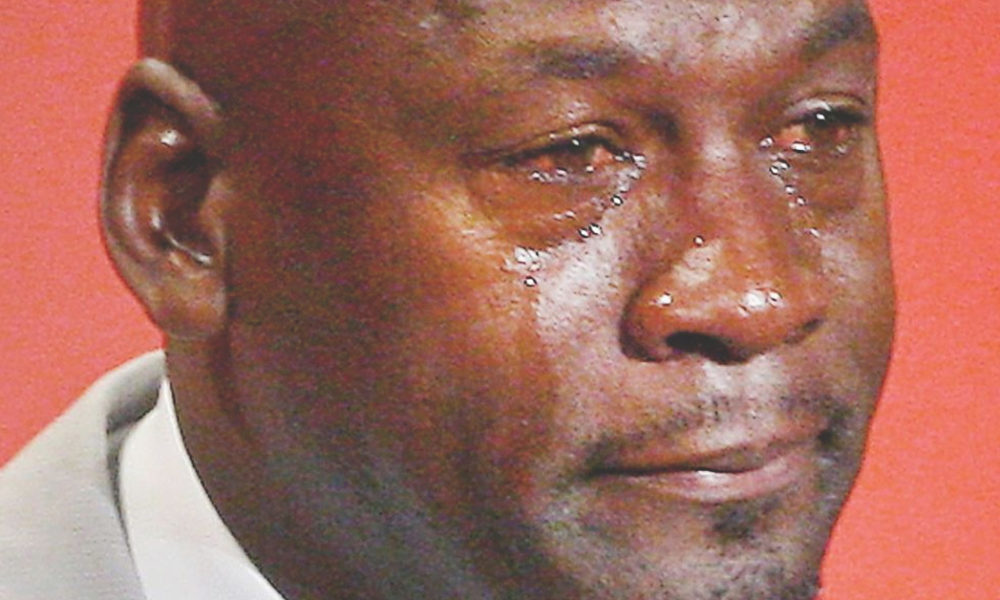

# **Some final visualizations**

As a conclusion to the project, we decided to plot the evolution over time of the happiness score of the countries, analysing separately each continent.

We keep as data the name of the country, the continent it belongs to and some data relative to each year: the happiness score, the population and the density

In [36]:
#@title
csvComplete = pd.read_csv("https://raw.githubusercontent.com/Zatfer17/dataviz/master/countries_dataset.csv")
csvComplete.rename(columns = {'Country or region':'Country'}, inplace = True) 

rows2015 = csvComplete[["Country", "Continent", "Score 2015", "Popul 2015", "Dens 2015"]]
rows2016 = csvComplete[["Country", "Continent",  "Score 2016", "Popul 2016", "Dens 2016"]]
rows2017 = csvComplete[["Country", "Continent",  "Score 2017", "Popul 2017", "Dens 2017"]]
rows2018 = csvComplete[["Country", "Continent",  "Score 2018", "Popul 2018", "Dens 2018"]]

rows2015 = rows2015.rename(columns={"Score 2015": "Score", "Popul 2015": "Population", "Dens 2015": "Density"})
rows2016 = rows2016.rename(columns={"Score 2016": "Score", "Popul 2016": "Population", "Dens 2016": "Density"})
rows2017 = rows2017.rename(columns={"Score 2017": "Score", "Popul 2017": "Population", "Dens 2017": "Density"})
rows2018 = rows2018.rename(columns={"Score 2018": "Score", "Popul 2018": "Population", "Dens 2018": "Density"})

rows2015 = rows2015.assign(Year='2015')
rows2016 = rows2016.assign(Year='2016')
rows2017 = rows2017.assign(Year='2017')
rows2018 = rows2018.assign(Year='2018')

rows2015.head()

,Country,Continent,Score,Population,Density,Year
0,United Arab Emirates,Asia,6.901,9262900.0,130.426640,2015
1,Afghanistan,Asia,3.575,34413603.0,52.712071,2015
2,Armenia,Asia,4.350,2925553.0,102.759150,2015
3,Argentina,South America,6.574,43131966.0,15.760633,2015
4,Austria,Europe,7.200,8642699.0,104.730793,2015


We include also the extension of each country as an additional datum, calculating it from the population and density values. Better calculate the extension for each year, just in case.

In [37]:
#@title
rows2015 = rows2015.assign(Extension = (rows2015["Population"] / rows2015["Density"]))
rows2016 = rows2016.assign(Extension = (rows2016["Population"] / rows2016["Density"]))
rows2017 = rows2017.assign(Extension = (rows2017["Population"] / rows2017["Density"]))
rows2018 = rows2018.assign(Extension = (rows2018["Population"] / rows2018["Density"]))

rows2015.head()

,Country,Continent,Score,Population,Density,Year,Extension
0,United Arab Emirates,Asia,6.901,9262900.0,130.426640,2015,7.102000e+04
1,Afghanistan,Asia,3.575,34413603.0,52.712071,2015,6.528600e+05
2,Armenia,Asia,4.350,2925553.0,102.759150,2015,2.847000e+04
3,Argentina,South America,6.574,43131966.0,15.760633,2015,2.736690e+06
4,Austria,Europe,7.200,8642699.0,104.730793,2015,8.252300e+04


We chose an alphabetical order to facilitate following the evolution of a specific country through the years, instead of changing the order each year according to the Happiness score.

We show the evolution of European countries' happiness through the years:

In [38]:
#@title
result = pd.concat([pd.concat([pd.concat([rows2015, rows2016], ignore_index=True, axis=0), rows2017], ignore_index=True, axis=0), rows2018], ignore_index=True, axis=0)

px.scatter(result[result["Continent"] == "Europe"], x="Country", y="Score", animation_frame="Year", animation_group="Country", color="Country", hover_name="Country", hover_data=["Population", "Density", "Extension"])

Now to America and Oceania:

In [39]:
#@title
px.scatter(result[result["Continent"].isin(["North America", "South America", "Oceania"])], x="Country", y="Score", animation_frame="Year", animation_group="Country", color="Country", hover_name="Country", hover_data=["Population", "Density", "Extension"])

Also Asia:

In [40]:
#@title
px.scatter(result[result["Continent"] == "Asia"], x="Country", y="Score", animation_frame="Year", animation_group="Country", color="Country", hover_name="Country", hover_data=["Population", "Density", "Extension"])

Finally Africa:

In [41]:
#@title
px.scatter(result[result["Continent"] == "Africa"], x="Country", y="Score", animation_frame="Year", animation_group="Country", color="Country", hover_name="Country", hover_data=["Population", "Density", "Extension"])

Thank you for reading!

Stefano Fedeli, Matteo Ferrini, Andrea Pozzoli